<a href="https://colab.research.google.com/github/sarasti2/network_in_economics/blob/main/create_and_analyze_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Initial configuration

import pandas as pd
import requests
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
from io import StringIO
from networkx.algorithms.assortativity import attribute_assortativity_coefficient

# Mini-Project: Networks in Economics  
**Summer School in Economics 2025**

**Authors**: Alejandro Sarasti, Juan Sebastián Osorno, María Paula Murcia  

This mini-project is part of the Summer Course on Networks in Economics. The objective is to create and analyze the friendship network among students participating in the course.


## Load matrix of the network of friends

In [2]:

# URL of the raw CSV file on GitHub
github_url = 'https://raw.githubusercontent.com/sarasti2/network_in_economics/main/graph_matrix_friends.csv'

try:
    # Download the CSV file from the GitHub URL
    response = requests.get(github_url)
    response.raise_for_status() # Raise an exception for bad status codes

    # Read the content into a pandas DataFrame
    friendship_matrix = pd.read_csv(StringIO(response.text), index_col=0)
    friendship_matrix = friendship_matrix.drop(columns=['Unnamed: 4', "Unnamed: 5", "Student's name"])

    # Display the first few rows of the matrix
    print("Friendship Matrix (first 5 rows):")
    display(friendship_matrix.head())

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Friendship Matrix (first 5 rows):


,Student's gender,Student's type,1,2,3,4,5,6,7,8,...,27,28,29,30,31,32,33,34,35,36
Student's number,,,,,,,,,,,,,,,,,,,,,
1,Male,Master's student,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Female,Master's student,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Female,Master's student,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,Male,Master's student,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Male,Master's student,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Visualize the graph


In [3]:
# Select only the columns that are student numbers (integers)
adj_matrix = friendship_matrix.select_dtypes(include=[np.number])

# Convert the DataFrame to a NumPy array
adj_array = adj_matrix.values

# Create a NetworkX graph object from the NumPy array
G = nx.from_numpy_array(adj_array)

# Print information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 36
Number of edges: 74


In [4]:
for index, row in friendship_matrix.iterrows():
    # Get the student number (index in the original dataframe)
    student_number = index

    # Get the corresponding node index in the NetworkX graph (0-indexed)
    node_index = student_number - 1

    # Check if the node exists in the graph
    if node_index in G.nodes():
        # Extract attributes
        gender = row["Student's gender"]
        student_type = row["Student's type"]

        # Add attributes to the node
        G.nodes[node_index]['gender'] = gender
        G.nodes[node_index]['type'] = student_type
    else:
        print(f"Warning: Node with index {node_index} (corresponding to student {student_number}) not found in the graph.")

#Verify attributes for a few nodes
print("\nNode attributes for node 0 (Student 1):", G.nodes[0])
print("Node attributes for node 1 (Student 2):", G.nodes[1])
print("Node attributes for node 35 (Student 36):", G.nodes[35])


Node attributes for node 0 (Student 1): {'gender': 'Male', 'type': "Master's student"}
Node attributes for node 1 (Student 2): {'gender': 'Female', 'type': "Master's student"}
Node attributes for node 35 (Student 36): {'gender': 'Male', 'type': "Master's student"}


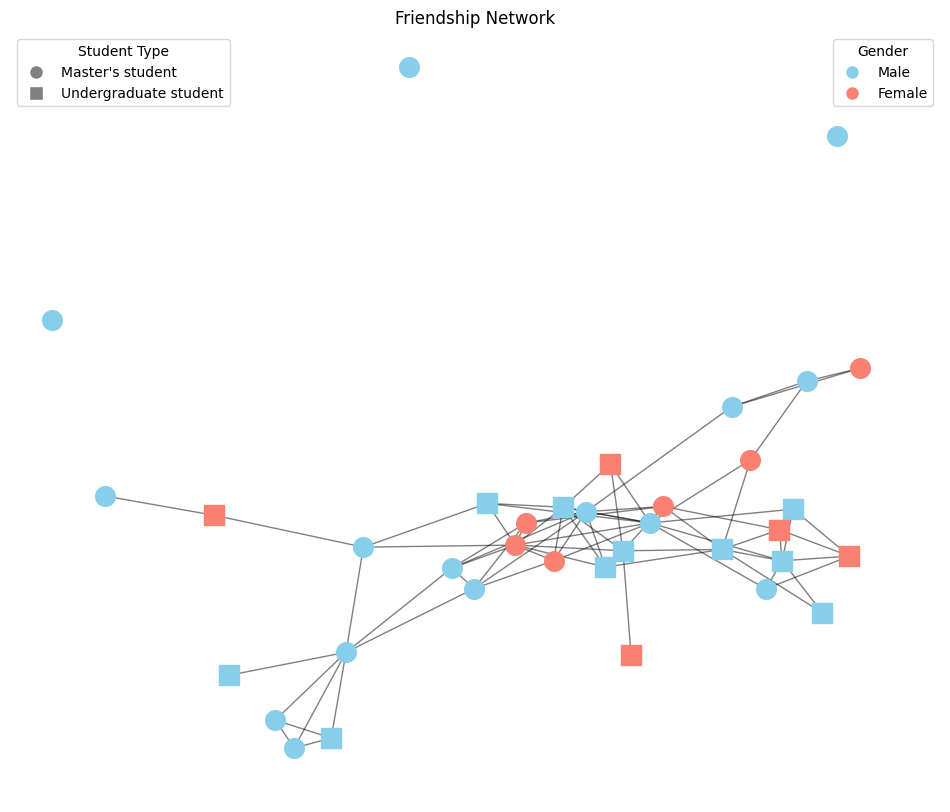

In [21]:
# Define node colors based on gender
gender_map = {'Male': 'skyblue', 'Female': 'salmon'}
node_colors = [gender_map[G.nodes[node]['gender']] for node in G.nodes()]

# Define node shapes based on student type
type_map = {"Master's student": 'o', 'Undergraduate student': 's'}
node_shapes = [type_map[G.nodes[node]['type']] for node in G.nodes()]

# Define the layout for the graph with increased spacing
pos = nx.spring_layout(G, k=0.3) # Increase k for more spacing

# Draw the graph
plt.figure(figsize=(12, 10))
for i, node in enumerate(G.nodes()):
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_colors[i], node_shape=node_shapes[i], node_size=200, label=f"{G.nodes[node]['gender']}, {G.nodes[node]['type']}")
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Create a legend for gender
gender_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Male',
                          markerfacecolor='skyblue', markersize=10),
                          plt.Line2D([0], [0], marker='o', color='w', label='Female',
                          markerfacecolor='salmon', markersize=10)]

# Create a legend for student type
type_legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label="Master's student",
                          markerfacecolor='gray', markersize=10),
                        plt.Line2D([0], [0], marker='s', color='w', label='Undergraduate student',
                          markerfacecolor='gray', markersize=10)]

legend1 = plt.legend(handles=gender_legend_elements, loc='upper right', title='Gender')
plt.gca().add_artist(legend1)

legend2 = plt.legend(handles=type_legend_elements, loc='upper left', title='Student Type')


plt.title("Friendship Network")
plt.axis('off') # Hide axes
plt.show()

## Network Properties Calculation

Now, let's calculate some key network properties to understand the structure of the friendship graph.

### Degree Distribution


Degree Distribution:
Degree 10: 1 nodes
Degree 9: 2 nodes
Degree 8: 1 nodes
Degree 7: 4 nodes
Degree 5: 7 nodes
Degree 4: 4 nodes
Degree 3: 8 nodes
Degree 2: 3 nodes
Degree 1: 3 nodes
Degree 0: 3 nodes


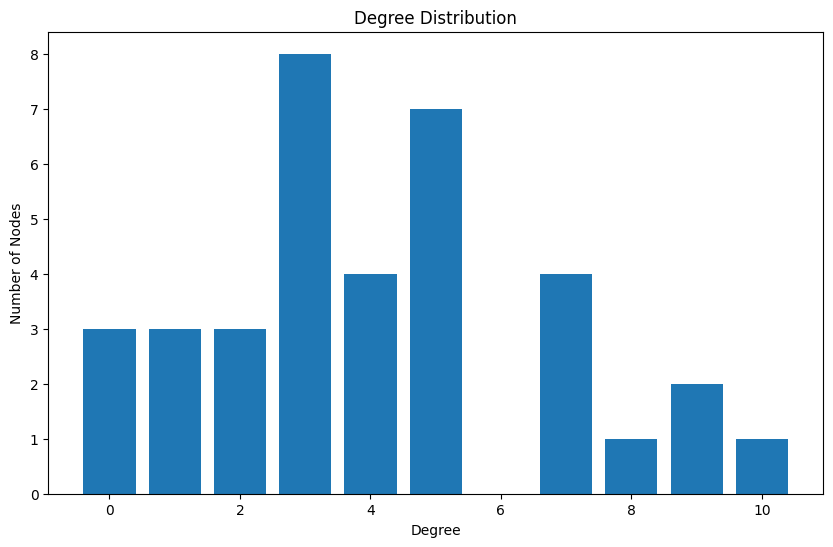

In [6]:
# Calculate Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_counts = {}
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

print("Degree Distribution:")
for degree, count in degree_counts.items():
    print(f"Degree {degree}: {count} nodes")

plt.figure(figsize=(10, 6))
plt.bar(list(degree_counts.keys()), list(degree_counts.values()))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

In [7]:
# Calculate Mean Degree
mean_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print(f"\nMean Degree: {mean_degree:.2f}")

# Calculate Degree Variance
degrees = np.array([d for n, d in G.degree()])
degree_variance = np.var(degrees)
print(f"Degree Variance: {degree_variance:.2f}")

# Calculate Network Density
density = nx.density(G)
print(f"Network Density: {density:.4f}")


Mean Degree: 4.11
Degree Variance: 6.65
Network Density: 0.1175


### Average distance for the largest component

In [24]:
# Calculate Average Shortest Path Length for the largest connected component

if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"Average Shortest Path Length (entire graph): {avg_shortest_path:.2f}")
else:
    print("Graph is not connected fully conenct. Calculating average shortest path length for the largest component.")
    # Find the largest connected component
    largest_component = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_component)

    if subgraph.number_of_nodes() > 1:
        avg_shortest_path = nx.average_shortest_path_length(subgraph)
        print(f"Average Shortest Path Length (largest connected component): {avg_shortest_path:.2f}")
    else:
        avg_shortest_path = 0
        print("The largest component has only one node, cannot calculate average shortest path length.")

Graph is not connected. Calculating average shortest path length for the largest component.
Average Shortest Path Length (largest connected component): 2.90


### Average cluster coefficient

In [9]:
# Calculate Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)

# Print the calculated average clustering coefficient
print(f"Average Clustering Coefficient: {avg_clustering:.2f}")

Average Clustering Coefficient: 0.41


### Coleman coeficcient for homophily

In [16]:
# Calculate the Coleman index of homophily for the 'gender'
coleman_gender = attribute_assortativity_coefficient(G, 'gender')
print(f"\nColeman Index of Homophily (Gender) - using attribute assortativity coefficient: {coleman_gender:.2f}")


Coleman Index of Homophily (Gender) - using attribute assortativity coefficient: -0.10


In [27]:
# Calculate the attribute assortativity coefficient for 'type' (e.g., level of studies)
level_study_assortativity = attribute_assortativity_coefficient(G, 'type')

# Display the calculated Coleman Index of Homophily
print(f"\nColeman Index of Homophily based on Level of Studies: {level_study_assortativity:.2f}")


Coleman Index of Homophily based on Level of Studies: 0.31


## Conlusion and final remarks

We are analyzing a small but highly connected social network, characterized by a mean degree of approximately 4. This indicates that, on average, each individual is directly connected to four others. However, the variance in degree is relatively high (6.5), suggesting considerable heterogeneity in the number of connections. This is driven by a few highly connected individuals—three nodes have more than nine connections, acting as potential hubs or central figures within the network.

All but one person in the network is connected to at least one other, reflecting a strong overall level of inclusion. Nevertheless, the average distance (2.9) is somewhat large given the small size and relatively high average degree of the network. This suggests that while most individuals are connected, paths between some nodes may still be relatively long, likely due to the network’s moderate density (0.117). This density means that only about 11.7% of all possible ties are present, which limits the speed or ease with which information or influence might travel across the network.

In terms of homophily, we find differing patterns depending on the attribute examined:

Gender-based homophily appears to be slightly negative, indicating that individuals are not more likely to be connected to others of the same gender. This could be due to an imbalance in gender distribution (e.g., if one gender is dominant in the sample, men), which structurally limits the potential for same-gender connections. It's also possible that gender is not a salient attribute in the formation of ties within this group.

In contrast, homophily based on student level (e.g., undergraduate vs. master's) is positive and notably stronger. This suggests that individuals are more likely to connect with others at the same academic level. One plausible explanation is shared academic experiences, such as attending the same courses or participating in group assignments, which foster repeated interactions and thus social ties.

Overall, the structure and dynamics of this network reveal moderate cohesion with key hubs, and attribute-based preferences that shape connection patterns, particularly by academic level rather than gender.